# Predicting Reporting Time for Austin Crimes - Machine Learning

In this part of the project, two types of machine learning algorithms will be generated:

1) Regression models, since duration is a continuous numerical variable,

2) Classification model, since around 50% of the durations are zero, that we may classify the target variable as zero or non-zero

In [1]:
# Import required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Since we have so many columns in the dataframe, we need to change the Pandas settings to observe the data frame more efficiently:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Upload the csv file into pandas
# For efficiency and speed, we will choose a sample of 20000
df = pd.read_csv(r'C:\Users\Servet\Desktop\Jupyter_Notebooks\Crime_Data_with_dummies.csv').sample(20000)
# Check how the data looks like
df.head()

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,incident_number,highest_offense_description,highest_offense_code,occurred_date_time,occurred_date,occurred_time,report_date_time,report_date,report_time,address,zip_code,council_district,pra,census_tract,clearance_date,ucr_category,category_description,x-coordinate,latitude,longitude,location,duration,duration_is_negative,address_isnull,apd_sector_isnull,apd_district_isnull,location_type_isnull,location_isnull,clearance_date_isnull,clearance_status_isnull,ucr_category_isnull,category_description_isnull,pra_isnull,zip_code_isnull,longitude_isnull,latitude_isnull,census_tract_isnull,council_district_isnull,x_coordinate_isnull,year,month,day,hour,weekday,weekday_true,location_type_ABANDONED/CONDEMNED STRUCTURE,location_type_AMUSEMENT PARK,location_type_ARENA / STADIUM / FAIRGROUNDS / COLISEUM,location_type_ATM SEPARATE FROM BANK,location_type_AUTO DEALERSHIP NEW / USED,location_type_BANKS / SAVINGS & LOAN,location_type_BAR / NIGHT CLUB,location_type_CAMP / CAMPGROUND,location_type_CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,location_type_COMMERCIAL / OFFICE BUILDING,location_type_COMMUNITY CENTER,location_type_CONSTRUCTION SITE,location_type_CONVENIENCE STORE,location_type_CYBERSPACE,location_type_DAYCARE FACILITY,location_type_DEPARTMENT / DISCOUNT STORE,location_type_DOCK / WHARF / FREIGHT / MODAL TERMINAL,location_type_DRUG STORE / DR. OFFICE / HOSPITAL,location_type_FARM FACILITY,location_type_FIELD / WOODS,location_type_GAMBLING FACILITY / CASINO / RACE TRACK,location_type_GAS / SERVICE STATIONS,location_type_GOVERNMENT / PUBLIC BUILDING,location_type_GROCERY / SUPERMARKET,location_type_HOTEL / MOTEL / ETC.,location_type_INDUSTRIAL SITE,location_type_JAIL / PRISON,location_type_LAKE / WATERWAY,location_type_LIQUOR STORE,location_type_MILITARY INSTALLATION,location_type_NaN,location_type_OTHER / UNKNOWN,location_type_PARK / PLAYGROUND,location_type_PARKING LOTS / GARAGE,location_type_RENTAL STORAGE FACILITY,location_type_RESIDENCE / HOME,location_type_REST AREA,location_type_RESTAURANTS,location_type_SCHOOL - COLLEGE / UNIVERSITY,location_type_SCHOOL - ELEMENTARY / SECONDARY,location_type_SCHOOLS / COLLEGES,location_type_SHELTER-MISSION / HOMELESS,location_type_SHOPPING MALL,location_type_SPECIALTY STORE (TV FUR ETC.),location_type_STREETS / HWY / ROAD / ALLEY,location_type_TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),location_type_TRIBAL LANDS,family_violence_N,family_violence_Y,clearance_status_9,clearance_status_C,clearance_status_N,clearance_status_NaN,clearance_status_O,apd_sector_.,apd_sector_1,apd_sector_1124,apd_sector_2,apd_sector_21,apd_sector_4,apd_sector_44,apd_sector_6,apd_sector_8,apd_sector_83,apd_sector_88,apd_sector_95,apd_sector_99,apd_sector_A,apd_sector_A1,apd_sector_A2,apd_sector_AD,apd_sector_ADAM,apd_sector_AP,apd_sector_AS,apd_sector_AV,apd_sector_B,apd_sector_BA,apd_sector_BAKR,apd_sector_C,apd_sector_C1,apd_sector_CE,apd_sector_CH,apd_sector_CHAR,apd_sector_D,apd_sector_D6,apd_sector_D8,apd_sector_DA,apd_sector_DAVD,apd_sector_DR,apd_sector_E,apd_sector_E1,apd_sector_E4,apd_sector_ED,apd_sector_F,apd_sector_F6,apd_sector_F7,apd_sector_FR,apd_sector_G,apd_sector_GE,apd_sector_GR,apd_sector_GRGE,apd_sector_H,apd_sector_HE,apd_sector_HENRY,apd_sector_HR,apd_sector_I,apd_sector_ID,apd_sector_IDA,apd_sector_NaN,apd_sector_RD,apd_sector_SC,apd_sector_UT,apd_sector_WM,apd_district_0,apd_district_01,apd_district_02,apd_district_03,apd_district_04,apd_district_05,apd_district_06,apd_district_07,apd_district_08,apd_district_09,apd_district_1,apd_district_10,apd_district_11,apd_district_12,apd_district_17,apd_district_2,apd_district_3,apd_district_4,apd_district_493,apd_district_5,apd_district_6,apd_district_7,apd_district_8,apd_district_83,apd_district_88,apd_district_9,apd_district_999,apd_district_A,apd_district_A1,apd_district_A2,apd_district_A4,apd_district_A5,apd_district_A6,apd_district_A7,apd_district_ADAM3,apd_district_ADM,apd_district_B,apd_district_B1,apd_district_B4,apd_district_B5,apd_distri

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 204988 to 858293
Columns: 233 entries, Unnamed: 0 to apd_district_S10
dtypes: float64(9), int64(211), object(13)
memory usage: 35.7+ MB


## 1. Regression Models

When we define "duration" as our target variable, which is a continuous variable, we may consider the models as a regression problem. We will start with a linear regression model.

### a. Linear Regression

We will choose feature variables as non-object and not datetime variables

In [4]:
# We will define target and feature names 
target_name = ['duration']
feature_names = [c for c in df.columns if df[c].dtype != 'object' and c not in target_name and df[c].dtype != 'datetime64[ns]']

# We will use X and y for the feature and target variables
X = df[feature_names]
y = df[target_name]

In [5]:
# Let's check how many features we will initially use
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 204988 to 858293
Columns: 219 entries, Unnamed: 0 to apd_district_S10
dtypes: float64(8), int64(211)
memory usage: 33.6 MB


We have 211 features and this may cause curse of dimensionality and may reduce bothe train and test score for our models.

In [6]:
# Split the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


# Import Cross-Validation from scikitlearn
from sklearn.model_selection import cross_val_score

# Import Linear Regression library and MSE
from sklearn.linear_model import LinearRegression


# Instantiate a linear regression
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

# We will check the model's strength on training and testing set and see the percent change
print("linear regression score for training set:{}".format(lr.score(X_train,y_train)))
print("linear regression score for testing set:{}".format(lr.score(X_test,y_test)))

linear regression score for training set:0.35535878538390814
linear regression score for testing set:0.330392935782452


There might be an overfitting problem since there is a significant difference between train and test scores. We will cross-validate the score to see how the overfitting may be a problem or not.

In [8]:
# Cross-Validate the model
cv_lr_train_score = cross_val_score(lr,X_train,y_train,cv=5)
print(cv_lr_train_score)

cv_lr_test_score = cross_val_score(lr,X_test,y_test,cv=5)

#We would like to display as a Data Frame
pd.DataFrame(dict(train_scores=cv_lr_train_score, test_scores=cv_lr_test_score))

[0.36711532 0.33950842 0.35521932 0.32116922 0.34444684]


,train_scores,test_scores
0,0.367115,0.282197
1,0.339508,0.295015
2,0.355219,0.330634
3,0.321169,0.359385
4,0.344447,0.312267


### A. Scaling the Feature Variables

In [9]:
# We create an empty Scaled scores
# We will firstly include our unscaled scores as a dictionary in our list
hyper_param_list_scaler = [dict(scaler="unscaled", train_score=lr.score(X_train,y_train), test_score=lr.score(X_test,y_test))]

In [10]:
# Import all scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [11]:
# We will do a hyperparameter tuning to see which scaler will result the best test score
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer()]
for scaler in scalers:
    Xs_train = scaler.fit_transform(X_train)
    Xs_test = scaler.transform(X_test)
    lr.fit(Xs_train, y_train)
    train_score = lr.score(Xs_train, y_train)
    test_score = lr.score(Xs_test, y_test)
    hyper_params = dict(scaler=scaler, train_score=train_score, test_score=test_score)
    hyper_param_list_scaler.append(hyper_params)

In [12]:
df_hyper_param_scaler = pd.DataFrame(hyper_param_list_scaler)
df_hyper_param_scaler.round(4).sort_values('test_score')

,scaler,train_score,test_score
2,MaxAbsScaler(copy=True),0.3518,-8.004574e+20
3,"StandardScaler(copy=True, with_mean=True, with...",0.3496,-1.439947e+20
6,"QuantileTransformer(copy=True, ignore_implicit...",0.3426,-1.834160e+19
1,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.3554,-1.500217e+19
5,"Normalizer(copy=True, norm='l2')",0.0384,-3.458000e-01
4,"RobustScaler(copy=True, quantile_range=(25.0, ...",0.3554,3.300000e-01
0,unscaled,0.3554,3.304000e-01


There is not a big difference between scaled and robust, but just to get a new feature variables, we will defined 'Xs'scaled x with robust

In [13]:
robust_scaler_hyper_params = []

In [14]:
# We will perform a hyperparameter tuning with Robust Scaler with quantile range:
quantile_range = [(0.05,0.95),(0.15,0.85),(0.25,0.75),(0.35,0.65),(0.45,0.55)]
for quantile in quantile_range:
    scaler = RobustScaler(quantile_range=quantile)
    Xs_train = scaler.fit_transform(X_train)
    Xs_test = scaler.transform(X_test)
    lr.fit(Xs_train, y_train)
    train_score = lr.score(Xs_train, y_train)
    test_score = lr.score(Xs_test, y_test)
    hyper_params = dict(quantile=quantile, train_score=train_score, test_score=test_score)
    robust_scaler_hyper_params.append(hyper_params)

In [15]:
df_robust_scaler_hyper_params = pd.DataFrame(robust_scaler_hyper_params)
df_robust_scaler_hyper_params.round(4).sort_values('test_score')

,quantile,train_score,test_score
0,"(0.05, 0.95)",0.3554,0.33
1,"(0.15, 0.85)",0.3554,0.33
2,"(0.25, 0.75)",0.3554,0.33
3,"(0.35, 0.65)",0.3554,0.33
4,"(0.45, 0.55)",0.3554,0.33


In [16]:
# We do not see a difference between these hyperparameters
Xs = RobustScaler().fit_transform(X)
Xs_train, Xs_test, y_train, y_test = train_test_split( Xs, y, test_size=0.20, random_state=42)

In [17]:
SVR_hyper_param = []

### Ridge Regression

In [18]:
# We create an empty hyper-parameter list for tuning
hyper_param_list_ridge = []

In [19]:
from sklearn.linear_model import Ridge
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    ridge.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_ridge.append(hyper_params)

In [20]:
df_hyper_param_ridge = pd.DataFrame(hyper_param_list_ridge)
df_hyper_param_ridge.round(4)

,alpha,train_score,test_score
0,0.0001,0.3510,0.3281
1,0.0010,0.3119,0.2934
2,0.0100,0.2845,0.2690
3,0.1000,0.2789,0.2680
4,1.0000,0.2492,0.2437
5,10.0000,0.1037,0.1011
6,100.0000,0.0146,0.0142
7,1000.0000,0.0015,0.0014
8,10000.0000,0.0002,0.0001


In [21]:
# We will perform the same proces on the scaled data
hyper_param_scaled_ridge = []

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(Xs_train, y_train)
    ridge_pred = ridge.predict(Xs_test)
    train_score = ridge.score(Xs_train, y_train)
    test_score = ridge.score(Xs_test, y_test)
    ridge.score(Xs_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_scaled_ridge.append(hyper_params)
    
df_hyper_param_scaled_ridge = pd.DataFrame(hyper_param_scaled_ridge)
df_hyper_param_scaled_ridge.round(4)

,alpha,train_score,test_score
0,0.0001,0.3510,0.3281
1,0.0010,0.3119,0.2934
2,0.0100,0.2845,0.2690
3,0.1000,0.2789,0.2680
4,1.0000,0.2492,0.2437
5,10.0000,0.1037,0.1011
6,100.0000,0.0146,0.0142
7,1000.0000,0.0015,0.0014
8,10000.0000,0.0002,0.0001


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0,0.000001,0.00001,0.0001,0.001,0.01]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X,y)
ridge_cv.best_params_

{'alpha': 1e-06}

In [23]:
ridge_cv.best_score_

0.34427085428579424

### Lasso Regression

In [24]:
hyper_param_list_lasso = []

In [25]:
from sklearn.linear_model import Lasso
alphas = [0, 0.0001, 0.001, 0.01, 0.1,1,10]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=True, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    train_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_lasso.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524006315766112.1, tolerance: 162573696452.5558
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520639393895193.3, tolerance

In [26]:
df_hyper_param_lasso = pd.DataFrame(hyper_param_list_lasso)
df_hyper_param_lasso.round(5)

,alpha,train_score,test_score
0,0.0000,0.35536,0.33038
1,0.0001,0.35536,0.33038
2,0.0010,0.35536,0.33038
3,0.0100,0.35536,0.33039
4,0.1000,0.35535,0.33059
5,1.0000,0.35430,0.33158
6,10.0000,0.27839,0.26810


In [27]:
# We will try the same thing on the scaled data
hyper_param_scaled_lasso = []

In [28]:
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=True, max_iter=10000)
    lasso.fit(Xs_train, y_train)
    lasso_pred = lasso.predict(Xs_test)
    train_score = lasso.score(Xs_train, y_train)
    test_score = lasso.score(Xs_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_scaled_lasso.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28750312604523.375, tolerance: 162573696452.5558
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9234135968192.5, tolerance: 162573696452.5558
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4514195839800.75, tolerance: 162573696452.5558
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarni

In [29]:
df_hyper_param_scaled_lasso = pd.DataFrame(hyper_param_scaled_lasso)
df_hyper_param_scaled_lasso.round(5)

,alpha,train_score,test_score
0,0.1,0.35535,0.33059
1,0.2,0.35531,0.33078
2,0.3,0.35526,0.33095
3,0.4,0.35518,0.33110
4,0.5,0.35509,0.33123
5,0.6,0.35497,0.33133
6,0.7,0.35483,0.33143
7,0.8,0.35468,0.33150
8,0.9,0.35450,0.33155
9,1.0,0.35430,0.33158


In [30]:
param_grid = {'alpha':[0,0.000001,0.00001,0.0001,0.001,0.01]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X,y)
lasso_cv.best_params_

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526258751050059.75, tolerance: 162090221922.66815
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493721594699221.25, tolerance: 162090221922.66815
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493602682332153.2, tolerance: 162812216669.75732
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496138403864126.6, tolerance: 162759184096.24756
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: Convergenc

{'alpha': 0.0001}

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679499529629612.2, tolerance: 203040059454.2669
  positive)


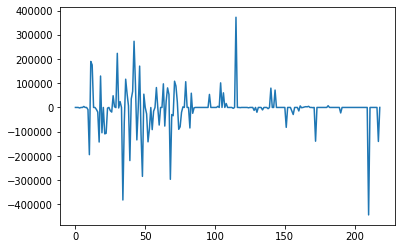

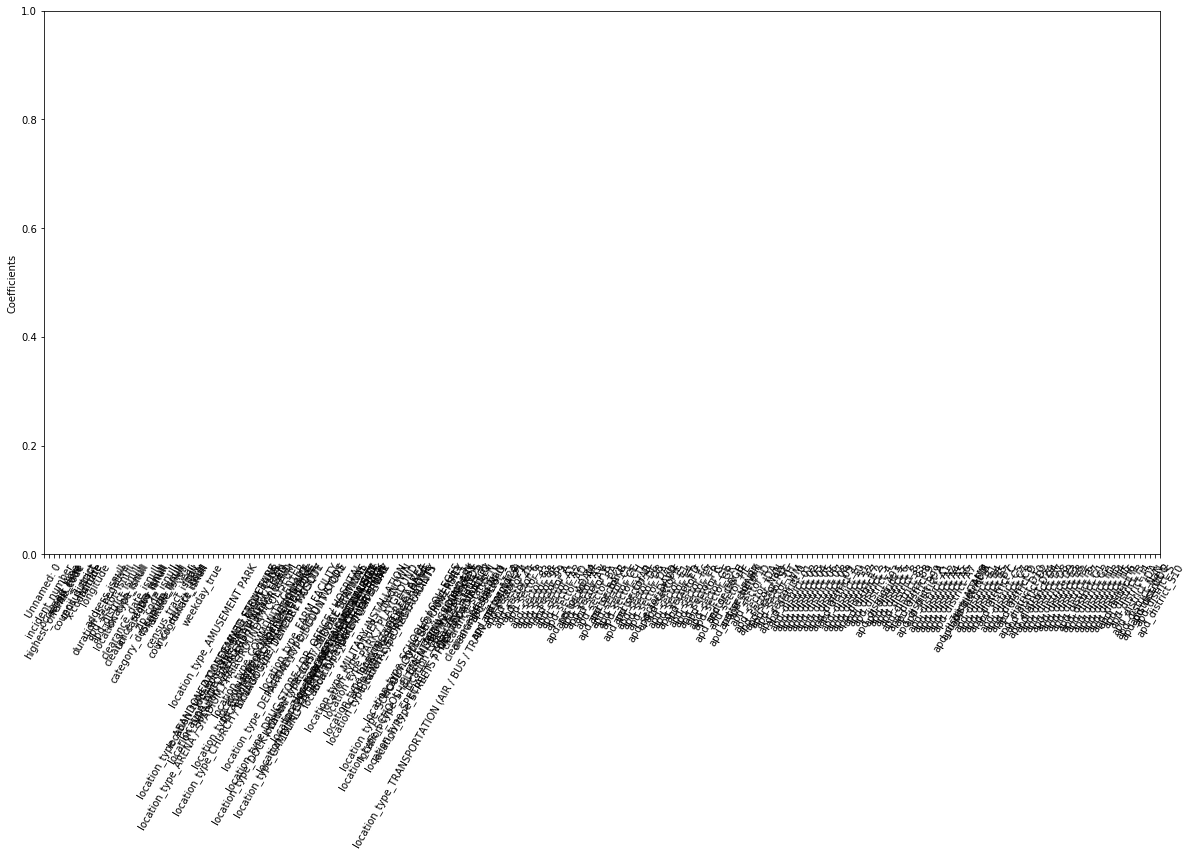

In [31]:
lasso = Lasso(alpha=1)
lasso_coef = lasso.fit(X,y).coef_

plt.plot(range(len(X.columns)), lasso_coef)
plt.figure(figsize=(20,10))

plt.xticks(range(len(X.columns)), X.columns, rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [32]:
sorted(lasso_coef)

[-443432.6984463153,
 -381871.44876648224,
 -296575.95999228535,
 -284421.9188297966,
 -219217.40374447618,
 -194864.52313008552,
 -142683.2282267122,
 -141896.3706025853,
 -140317.09350434464,
 -139268.45770663835,
 -133908.64331912776,
 -110995.86457730812,
 -108946.31321993363,
 -106741.38808906049,
 -104565.80847125202,
 -91535.75424694487,
 -90231.92344434575,
 -88143.97946239912,
 -84677.89650985938,
 -82125.50139864253,
 -79756.03286710617,
 -76881.705240501,
 -72612.05989429948,
 -60255.43995743014,
 -34011.10166370604,
 -29378.01029779999,
 -29126.47694934545,
 -26655.946320649982,
 -24101.510907436284,
 -22683.273531738098,
 -20167.307557588687,
 -19837.536074450185,
 -19048.899463336722,
 -18924.758967967966,
 -15701.637311212377,
 -14503.134475409704,
 -14139.837984807187,
 -13613.418402326246,
 -12059.070886613617,
 -10298.15701095371,
 -8901.270309525991,
 -8038.020710436142,
 -5077.053056682484,
 -3561.731942607222,
 -2667.962093581886,
 -2239.120332771003,
 -2134.513475

In [33]:
lasso_coef.argsort()[-10:]

array([ 79,  71,  36,  18,  46,  12,  11,  30,  42, 115], dtype=int64)

### D. Decision Trees

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
# Import accuracy score from sckit learn
from sklearn.metrics import accuracy_score

In [36]:
# Decision tree algorithm
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_regressor = DecisionTreeRegressor(max_depth=8, random_state=1)


# Fit dt_entropy to the training set
dt_regressor.fit(X_train, y_train)


print("Decision tree regressor score on the training data:{}".format(dt_regressor.score(X_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_regressor.score(X_test,y_test)))

Decision tree regressor score on the training data:0.5553505995784396
Decision tree entropy score on the testing data:0.47670128390269323


## Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50,random_state=38)
rf.fit(X_train,y_train)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=38, verbose=0, warm_start=False)

In [38]:
print("Random Forest Regressor score on the training data:{}".format(rf.score(X_train,y_train)))

print("Random Forest Regressor score on the testing data:{}".format(rf.score(X_test,y_test)))



Random Forest Regressor score on the training data:0.9538910014252246
Random Forest Regressor score on the testing data:0.6734664483006478


We can observe a significant overfitting problem. We may cross-validate the model:

In [39]:
# Cross-Validate the model
cv_rf_train_score = cross_val_score(rf,X_train,y_train,cv=5)
print(cv_rf_train_score)

cv_rf_test_score = cross_val_score(rf,X_test,y_test,cv=5)

#We would like to display as a Data Frame
pd.DataFrame(dict(train_scores=cv_rf_train_score, test_scores=cv_rf_test_score))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-

[0.69092036 0.65938412 0.68942278 0.66098187 0.6536247 ]


C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-

,train_scores,test_scores
0,0.690920,0.551821
1,0.659384,0.583578
2,0.689423,0.526927
3,0.660982,0.637855
4,0.653625,0.583837


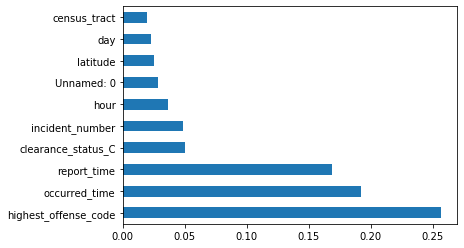

In [40]:
feat_importances = pd.Series(rf.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [45]:
from sklearn.feature_selection import SelectFromModel


# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(rf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


incident_number
highest_offense_code
occurred_time
report_time
hour
clearance_status_C


### Gradient Boost Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=38)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("GradientBoostingRegressor score on the training data:{}".format(gbr.score(X_train,y_train)))

print("GradientBoostingRegressor score on the testing data:{}".format(gbr.score(X_test,y_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor score on the training data:0.6763764122796314
GradientBoostingRegressor score on the testing data:0.6492603707277556


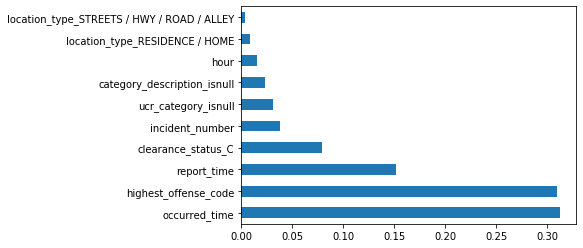

In [47]:
feat_importances = pd.Series(gbr.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Extra Tree Regressor

In [48]:
# Extra Tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100)
model.fit(X_train,y_train)

print("ExtraTreesRegressor score on the training data:{}".format(model.score(X_train,y_train)))

print("ExtraTreesRegressor score on the testing data:{}".format(model.score(X_test,y_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor score on the training data:1.0
ExtraTreesRegressor score on the testing data:0.6651546990145463


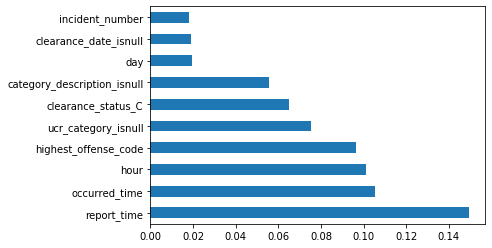

In [49]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 2. Logistic Regression

In [50]:
# We will create a new integer column as duration zero whether the duration is zero or not
df['duration_zero'] = np.where(df['duration']==0, 0, 1)

In [51]:
# Let's check the value counts of each of the values
df['duration_zero'].value_counts()

0    10058
1     9942
Name: duration_zero, dtype: int64

In [52]:
# We will define the target and feature names
log_target_name = ['duration_zero']
log_feature_names = [c for c in df.columns if df[c].dtype != 'object' and c not in target_name and df[c].dtype != 'datetime64[ns]' and c!= 'duration']

# We will use X and y for the feature and target variables
X_lr = df[log_feature_names]
y_lr = df[log_target_name]

In [53]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split( X_lr, y_lr, test_size=0.20, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=10000, penalty='l2')
logr.fit(X_lr_train, y_lr_train)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print("The logistic regression score on the scale training data:{}".format(logr.score(X_lr_train,y_lr_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(X_lr_test,y_lr_test)))

The logistic regression score on the scale training data:0.496375
The logistic regression score on the scaled testing data:0.5


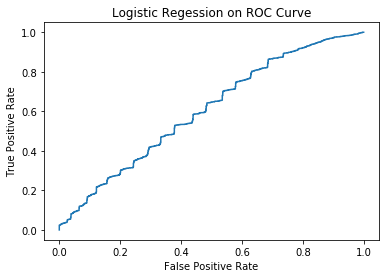

In [56]:
from sklearn.metrics import roc_curve
y_pred_prob = logr.predict_proba(X_lr_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_lr_test, y_pred_prob)
plt.plot(fpr, tpr, LAbel='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regession on ROC Curve')
plt.show()

In [57]:
pd.DataFrame(logr.predict_proba(X_lr_test)).head(10)

,0,1
0,0.499995,0.500005
1,0.499948,0.500052
2,0.499480,0.500520
3,0.499948,0.500052
4,0.499481,0.500519
5,0.448320,0.551680
6,0.499479,0.500521
7,0.499477,0.500523
8,0.499478,0.500522
9,0.499478,0.500522


In [58]:
from sklearn.metrics import roc_auc_score
logr.fit(X_lr_train, y_lr_train)
y_pred_prob = logr.predict_proba(X_lr_test)[:,1]
roc_auc_score(y_lr_test, y_pred_prob)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6045875

In [59]:
cv_scores = cross_val_score(logr, X_lr, y_lr, cv=5, scoring = 'roc_auc')
pd.DataFrame(cv_scores)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-v

,0
0,0.612226
1,0.609597
2,0.599977
3,0.614149
4,0.601449


### Scaling the features

In [60]:
# Import scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the features: X_scaled
scaler.fit(X_lr)
Xs = scaler.transform(X_lr)


In [61]:
# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X_lr))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X_lr)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(Xs))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(Xs)))

Mean of Unscaled Features: Unnamed: 0              1.128283e+06
incident_number         6.876777e+10
highest_offense_code    1.776645e+03
occurred_time           1.320167e+03
report_time             1.322136e+03
zip_code                7.872768e+04
council_district        4.931000e+00
census_tract            7.601629e+03
x-coordinate            3.237260e+06
latitude                3.028993e+01
                            ...     
apd_district_I1         5.000000e-05
apd_district_I3         0.000000e+00
apd_district_I4         0.000000e+00
apd_district_IDA        0.000000e+00
apd_district_NaN        4.150000e-03
apd_district_OOC        0.000000e+00
apd_district_P          0.000000e+00
apd_district_S          3.750000e-03
apd_district_S10        0.000000e+00
duration_zero           4.971000e-01
Length: 220, dtype: float64
Standard Deviation of Unscaled Features: Unnamed: 0              6.468719e+05
incident_number         3.162681e+11
highest_offense_code    1.207503e+03
occurred_time   

In [62]:
Xs_train, Xs_test, y_lr_train, y_lr_test = train_test_split(Xs, y_lr, test_size=0.20, random_state=30)


print("The logistic regression score on the scaled training data:{}".format(logr.score(Xs_train,y_lr_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(Xs_test,y_lr_test)))

The logistic regression score on the scaled training data:0.5045
The logistic regression score on the scaled testing data:0.4955


In [63]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(Xs_train,y_lr_train)

print("The KNN score on the training set:{}".format(knn.score(Xs_train,y_lr_train)))

print("The KNN score on the testing set:{}".format(knn.score(Xs_test,y_lr_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The KNN score on the training set:0.957375
The KNN score on the testing set:0.93175


### Random Forest Clasifier

In [64]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_lr_train,y_lr_train)

y_pred=clf.predict(X_lr_test)


# Get the accuracy score
acc=accuracy_score(y_lr_test, y_pred)


# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.5f}.".format(acc))

print("The clf score on the training data:{}".format(clf.score(X_lr_train,y_lr_train)))

print("The clf regression score on the testing data:{}".format(clf.score(X_lr_test,y_lr_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[Random forest algorithm] accuracy_score: 0.50600.
The clf score on the training data:1.0
The clf regression score on the testing data:0.506
